# Magnetic Multipole Simulation

This code will simulate the magnetic field from various configurations of magnets,
described in detail in this manuscript:
https://arxiv.org/abs/2109.03057.

This uses Magpylib, and is written for version 2.3.0b0.

Matthew C. Sullivan
Ithaca College
May 2022

This notebook calculates the field outside the magnet configuration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Box,Cylinder
from magpylib import Collection, displaySystem

%config InlineBackend.figure_format='svg'

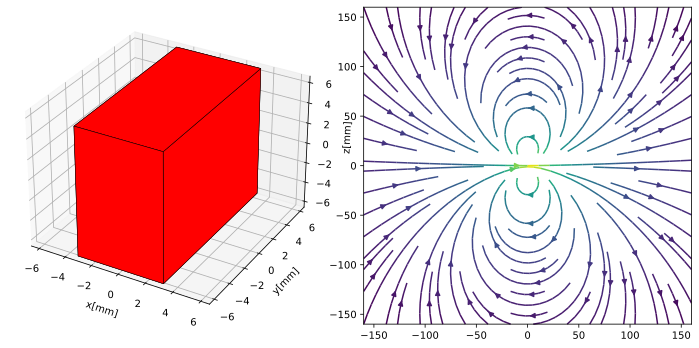

<Figure size 432x288 with 0 Axes>

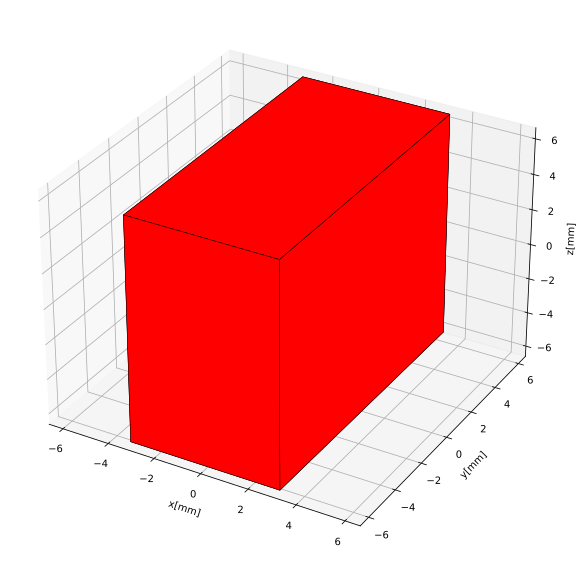

In [2]:
# create magnets - dipole

# This sets the strength of the magnets.  This is equivalent to a dipole moment of 1.12 Am^2.
exponent = -.603+6.778+.01
#exponent=0


s1 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0.0, 0.0, 0.0))
#m_dip = 1.09 # A m^2
#mag = 2*m_dip*0.1
#s1 = Box(mag=(mag, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0.0, 0.0, 0.0))

# create collection
c = Collection(s1)

# manipulate magnets individually
#s1.rotate(45,(0,1,0), anchor=(0,0,0))
#s2.rotate(90,(0,0,1), anchor=(0,0,0))

# manipulate collection
'''c.move((-2,0,0))'''

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True,direc=True)

# display field in xz-plane using matplotlib
X,Z = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Z, U, V, color=np.log(U**2+V**2))

plt.show()

plt.figure(3)
# MCS trying to add a new figure.  7/27/2021
# I failed!  Looks like maybe the command ax.add-artist might work?
#fig2 = plt.figure(figsize=(5,5))
#ax1 = fig2.add_subplot()
displaySystem(c)

D=-0.603

Dipole results
The slope is -2.988 with an uncertainty of 0.000
The intercept is -0.593 with an uncertainty of 0.000


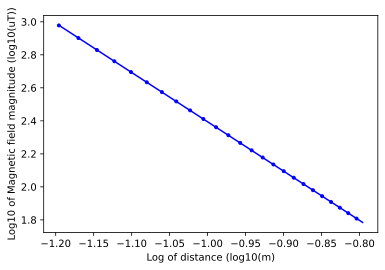

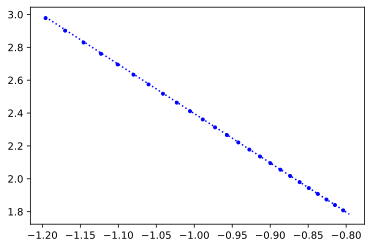

In [3]:
# This will plot the field along thje x-axis
# For a set of distances.


xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.',markevery=4)
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m)');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Dipole results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

dip_xdistlogcut = xdistlogcut
dip_Bslogcut = Bslogcut

fig = plt.figure(3)
ax = fig.add_subplot()


plt.plot(dip_xdistlogcut,dip_Bslogcut,'b.',markevery=4)
plt.plot(dip_xdistlogcut, D-3*dip_xdistlogcut,'b:')


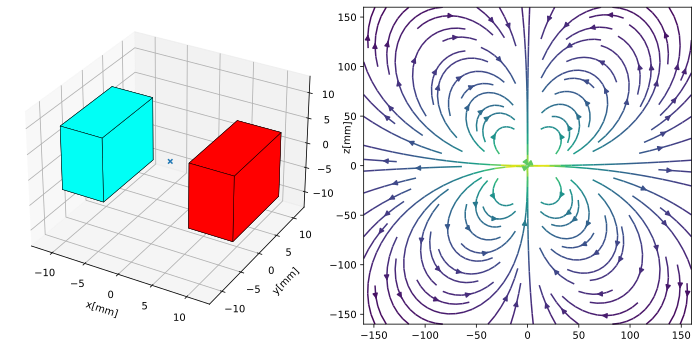

In [4]:
# Repeat the process for a quadrupole


s1 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(9.525, 0, 0), angle=0.0, axis=(0.0, 0.0, 1.0))
s2 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-9.525, 0, 0), angle=0.0, axis=(0.0, 0.0, 1.0))

# create collection
c = Collection(s1,s2)

# manipulate magnets individually
#s1.rotate(45,(0,1,0), anchor=(0,0,0))
#s2.rotate(90,(0,0,1), anchor=(0,0,0))

# manipulate collection
#c.move((9,-24,0))

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Y = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Y, U, V, color=np.log(U**2+V**2))

plt.show()

Linear quadrupole parallel to track results
The slope is -4.040 with an uncertainty of 0.001
The intercept is -1.876 with an uncertainty of 0.001


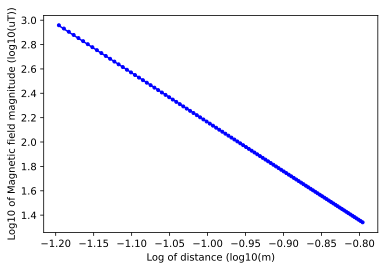

In [5]:

xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.')
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m)');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Linear quadrupole parallel to track results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

lqpar_xdistlogcut = xdistlogcut
lqpar_Bslogcut = Bslogcut

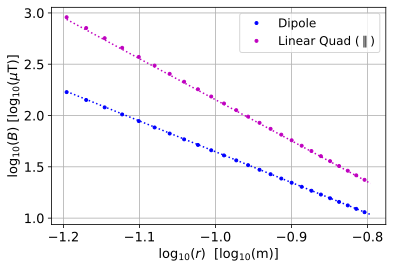

In [6]:
# Trying two figures at once.
a_q = 9.525e-3

plt.rcParams.update({'font.size':13})
plt.rcParams['figure.figsize'] = (6,4)

fig = plt.figure(3)
ax = fig.add_subplot()


plt.plot(dip_xdistlogcut,dip_Bslogcut-0.75,'b.',markevery=4,label='Dipole')
plt.plot(dip_xdistlogcut, D-3*dip_xdistlogcut-0.75,'b:')

plt.plot(lqpar_xdistlogcut,lqpar_Bslogcut,'m.',markevery=4,label=r'Linear Quad ($\parallel$)')
plt.plot(lqpar_xdistlogcut, np.log10(6*a_q)+D-4*lqpar_xdistlogcut,'m:')


plt.grid()
plt.xlabel(r'$\log_{10}(r)$  [$\log_{10}$(m)]');
plt.ylabel(r'$\log_{10}(B)$ [$\log_{10}(\mu$T)]');
plt.legend(loc='best',fontsize=12);

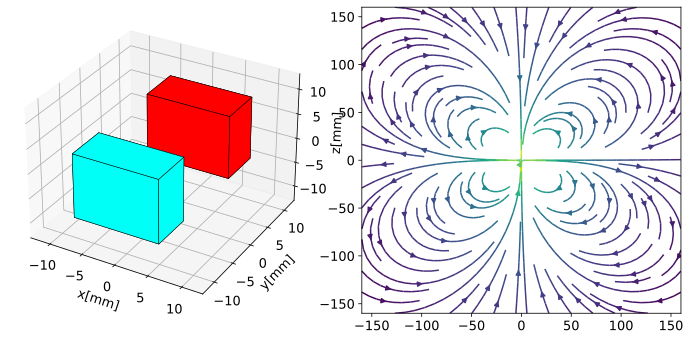

In [7]:
# create magnets - linear quadrupole
s3 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, 9.35, 0), angle=90.0, axis=(0.0, 0.0, 1.0))
s4 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, -9.35, 0), angle=-90.0, axis=(0.0, 0.0, 1.0))

# create collection
c = Collection(s3,s4)

# manipulate magnets individually
#s1.rotate(45,(0,1,0), anchor=(0,0,0))
#s2.rotate(90,(0,0,1), anchor=(0,0,0))

# manipulate collection
#c.move((9,-24,0))

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Y = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Y, U, V, color=np.log(U**2+V**2))

plt.show()



Linear quadrupole perpendicular to track results
The slope is -3.970 with an uncertainty of 0.001
The intercept is -2.132 with an uncertainty of 0.001


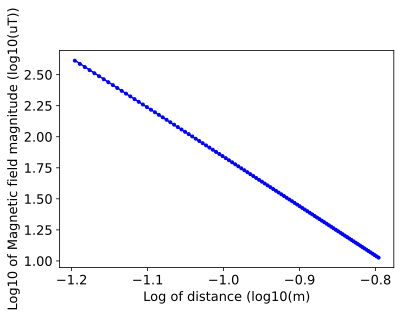

In [8]:

xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.')
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m)');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Linear quadrupole perpendicular to track results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

lqperp_xdistlogcut = xdistlogcut
lqperp_Bslogcut = Bslogcut

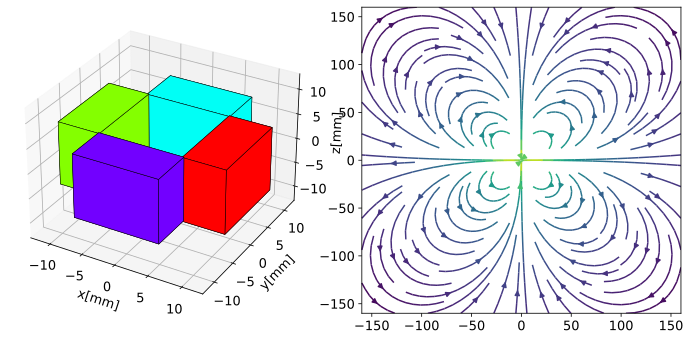

In [9]:
# create magnets - lanar quadrupole
s1 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(9.35, 0, 0), angle=0.0, axis=(0.0, 0.0, 1.0))
s2 = Box(mag=(1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-9.35, 0, 0), angle=180.0, axis=(0.0, 0.0, 1.0))
s3 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, 9.35, 0), angle=90.0, axis=(0.0, 0.0, 1.0))
s4 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, -9.35, 0), angle=-90.0, axis=(0.0, 0.0, 1.0))

# create collection
c = Collection(s1,s2,s3,s4)

# manipulate magnets individually
'''s3.rotate(90,(0,0,1), anchor=(0,0,0))
s4.rotate(90,(0,0,1), anchor=(0,0,0))
s3.move((9,-24,0))
s4.move((9,-24,0))'''

# manipulate collection
#c.move((9,-24,0))

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Y = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Y, U, V, color=np.log(U**2+V**2))

plt.show()

Planar Quadrupole results
The slope is -4.016 with an uncertainty of 0.000
The intercept is -1.689 with an uncertainty of 0.000


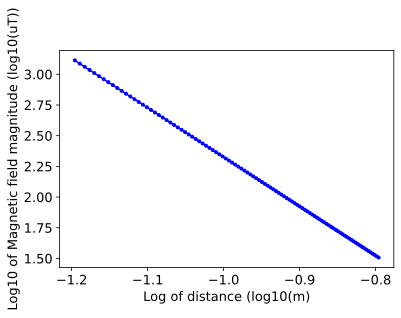

In [10]:

xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.')
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m)');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Planar Quadrupole results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

pquad_xdistlogcut = xdistlogcut
pquad_Bslogcut = Bslogcut

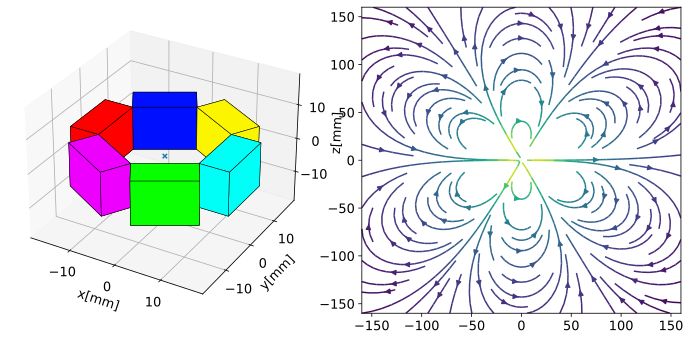

In [11]:
# create magnets - sextupole
s1 = Box(mag=((-1*10**exponent)*1.00, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-14.17, 0, 0), angle=180.0, axis=(0.0, 0.0, 1.0))
s2 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(14.17, 0, 0), angle=0.0, axis=(0.0, 0.0, 1.0))
s3 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(7.085, 12.272, 0), angle=60.0, axis=(0.0, 0.0, 1.0))
s4 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(7.085, -12.272, 0), angle=-60.0, axis=(0.0, 0.0, 1.0))
s5 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-7.085, 12.2725, 0), angle=120.0, axis=(0.0, 0.0, 1.0))
s6 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-7.085, -12.272, 0), angle=-120.0, axis=(0.0, 0.0, 1.0))


# create collection
c = Collection(s1,s3,s4,s2,s5,s6)
#c = Collection(s4,s5)

'''s3.rotate(90,(0,0,1), anchor=(0,0,0))
s4.rotate(90,(0,0,1), anchor=(0,0,0))
s3.move((9,-24,0))
s4.move((9,-24,0))'''

# manipulate collection
#c.move((9,-24,0))

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Y = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Y, U, V, color=np.log(U**2+V**2))

plt.show()

Sextupole results
The slope is -5.033 with an uncertainty of 0.001
The intercept is -2.995 with an uncertainty of 0.001


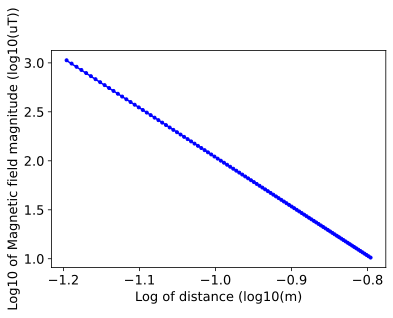

In [12]:

xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.')
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m)');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Sextupole results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

sext_xdistlogcut = xdistlogcut
sext_Bslogcut = Bslogcut

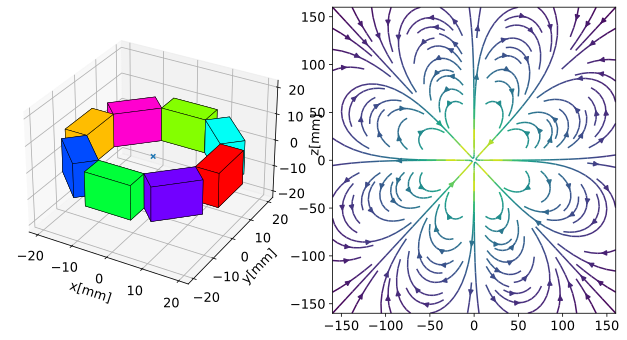

In [13]:
# create magnets - octupole
s1 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(18.505, 0, 0), angle=0.0, axis=(0.0, 0.0, 1.0))
s2 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-18.505, 0, 0), angle=180.0, axis=(0.0, 0.0, 1.0))
s3 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, 18.505, 0), angle=90.0, axis=(0.0, 0.0, 1.0))
s4 = Box(mag=(10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(0, -18.505, 0), angle=-90.0, axis=(0.0, 0.0, 1.0))
s5 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(13.085, 13.085, 0), angle=45.0, axis=(0.0, 0.0, 1.0))
s6 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-13.085, -13.085, 0), angle=-135.0, axis=(0.0, 0.0, 1.0))
s7 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(13.085, -13.085, 0), angle=-45.0, axis=(0.0, 0.0, 1.0))
s8 = Box(mag=(-1*10**exponent, 0.0, 0), dim=(6.35, 12.7, 12.7), pos=(-13.085, 13.085, 0), angle=135.0, axis=(0.0, 0.0, 1.0))

# create collection
c = Collection(s1,s2,s3,s4,s5,s6,s7,s8)

'''s3.rotate(90,(0,0,1), anchor=(0,0,0))
s4.rotate(90,(0,0,1), anchor=(0,0,0))
s3.move((9,-24,0))
s4.move((9,-24,0))'''

# manipulate collection
#c.move((9,-24,0))

# calculate B-field on a grid
xs = np.linspace(-160,160,330)
ys = np.linspace(-160,160,440)
POS = np.array([(x,y,0) for y in ys for x in xs])
Bs = c.getB(POS).reshape(440,330,3)     #<--VECTORIZED

# create figure
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(121, projection='3d')  # 3D-axis
ax2 = fig.add_subplot(122)                   # 2D-axis

# display system geometry on ax1
displaySystem(c, subplotAx=ax1, suppress=True)

# display field in xz-plane using matplotlib
X,Y = np.meshgrid(xs,ys)
U,V = Bs[:,:,0], Bs[:,:,1]
ax2.streamplot(X, Y, U, V, color=np.log(U**2+V**2))

plt.show()

Octupole results
The slope is -6.053 with an uncertainty of 0.001
The intercept is -4.240 with an uncertainty of 0.001


<ipython-input-14-a5f3c3d8233d>:2: RuntimeWarning: invalid value encountered in log10
  Bslog = np.log10(Bs[:,:,0][219][xs>0])


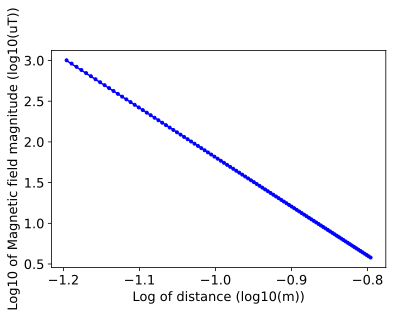

In [14]:


xdistlog = np.log10(xs[xs>0]*.001)
Bslog = np.log10(Bs[:,:,0][219][xs>0])

#ploting
howclose = -1.2
xdistlogcut = xdistlog[xdistlog>howclose]
Bslogcut = Bslog[xdistlog>howclose]

param,cov = np.polyfit(xdistlogcut,Bslogcut,1,cov=True)
uncert_param = np.sqrt(np.diag(cov))

plt.plot(xdistlogcut,Bslogcut,'b.')
plt.plot(xdistlogcut, param[0]*xdistlogcut+param[1],'b')
plt.xlabel('Log of distance (log10(m))');
plt.ylabel('Log10 of Magnetic field magnitude (log10(uT))');

print('Octupole results')
print('The slope is ' + "{:.3f}".format(param[0]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[0]))
print('The intercept is ' + "{:.3f}".format(param[1]) + ' with an uncertainty of ' + "{:.3f}".format(uncert_param[1]))

#plt.grid()
#print(xs[164:330])
#print(Bs[:,:,0][219][164:330])
#print(xdist[(xdist > -1.5)])

oct_xdistlogcut = xdistlogcut
oct_Bslogcut = Bslogcut

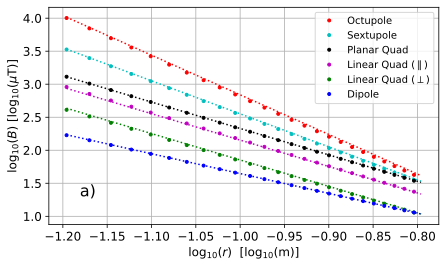

In [15]:
# Now adding all the figures one by one.
# 8/10/2021
a_q = 9.525e-3
a_s = 14.17*1e-3
a_o = 18.505*1e-3

plt.rcParams.update({'font.size':12})
plt.rcParams['figure.figsize'] = (7,4)

fig = plt.figure(3)
ax = fig.add_subplot()


plt.plot(oct_xdistlogcut, 1 + oct_Bslogcut,'r.',markevery=4,label='Octupole')
plt.plot(oct_xdistlogcut, 1 +np.log10(175*a_o**3/4)+D-6*oct_xdistlogcut,'r:')

plt.plot(sext_xdistlogcut,0.5 + sext_Bslogcut,'c.',markevery=4,label='Sextupole')
plt.plot(sext_xdistlogcut, 0.5 + np.log10((90/4)*a_s**2)+D-5*sext_xdistlogcut,'c:')

plt.plot(pquad_xdistlogcut,pquad_Bslogcut,'k.',markevery=4,label='Planar Quad')
plt.plot(pquad_xdistlogcut, np.log10(9*a_q)+D-4*pquad_xdistlogcut,'k:')

plt.plot(lqpar_xdistlogcut,lqpar_Bslogcut,'m.',markevery=4,label=r'Linear Quad ($\parallel$)')
plt.plot(lqpar_xdistlogcut, np.log10(6*a_q)+D-4*lqpar_xdistlogcut,'m:')

plt.plot(lqperp_xdistlogcut,lqperp_Bslogcut,'g.',markevery=4,label=r'Linear Quad ($\perp$)')
plt.plot(lqperp_xdistlogcut, np.log10(3*a_q)+D-4*lqperp_xdistlogcut,'g:')

plt.plot(dip_xdistlogcut,-0.75 + dip_Bslogcut,'b.',markevery=4,label='Dipole')
plt.plot(dip_xdistlogcut, -0.75 + D-3*dip_xdistlogcut,'b:')

plt.text(0.1, 0.15, 'a)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=16)





plt.grid()
plt.xlabel(r'$\log_{10}(r)$  [$\log_{10}$(m)]');
plt.ylabel(r'$\log_{10}(B)$ [$\log_{10}(\mu$T)]');
plt.legend(loc='best',fontsize=10);

plt.savefig('simulation.pdf',bbox_inches = 'tight')